In [1]:
import pandas as pd
import statsmodels.api as sm

# Example data: Replace with your actual DataFrame
data = pd.DataFrame({
    'shop_id': [1, 1, 1, 2, 2, 2],
    'feature_1': [10, 20, 30, 40, 50, 60],
    'feature_2': [5, 7, 8, 10, 15, 20],
    'sales_count': [100, 200, 150, 400, 500, 600]
})

# Filter for a specific shop_id (e.g., shop_id = 1)
shop_data = data[data['shop_id'] == 1]

# Define predictors (X) and target (y)
X = shop_data[['feature_1', 'feature_2']]  # Select relevant columns
y = shop_data['sales_count']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Display the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            sales_count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 25 Dec 2024   Prob (F-statistic):                nan
Time:                        13:56:38   Log-Likelihood:                 82.040
No. Observations:                   3   AIC:                            -158.1
Df Residuals:                       0   BIC:                            -160.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -450.0000        inf         -0        n

c:\Program Files\Python312\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Program Files\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Program Files\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Program Files\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


In [2]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Example data
data = pd.DataFrame({
    'shop_id': [1, 1, 1, 2, 2, 2],
    'feature_1': [10, 20, 30, 40, 50, 60],
    'feature_2': [5, 7, 8, 10, 15, 20],
    'sales_count': [100, 200, 150, 400, 500, 600]
})

# Filter for a specific shop_id (e.g., shop_id = 1)
shop_data = data[data['shop_id'] == 1]

# Define predictors (X) and target (y)
X = shop_data[['feature_1', 'feature_2']]
y = shop_data['sales_count']

# Fit a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Get feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)


     Feature  Importance
1  feature_2    0.517647
0  feature_1    0.482353


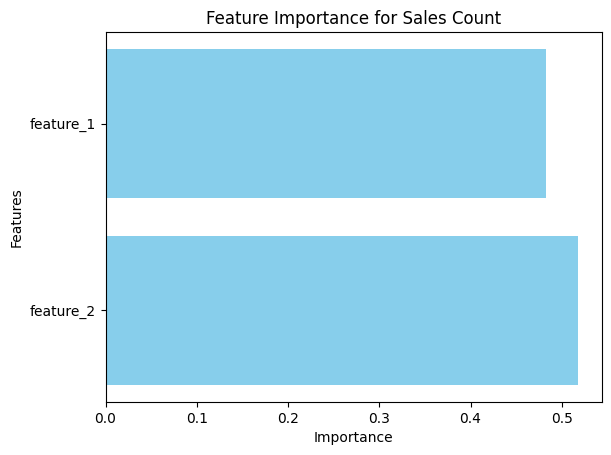

In [3]:
import matplotlib.pyplot as plt

# Example visualization
feature_importances = [0.517647, 0.482353]
features = ['feature_2', 'feature_1']

plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Sales Count')
plt.show()


In [4]:
# Correlation between feature_2 and sales_count
correlation = shop_data[['feature_2', 'sales_count']].corr()
print(correlation)


             feature_2  sales_count
feature_2     1.000000     0.654654
sales_count   0.654654     1.000000


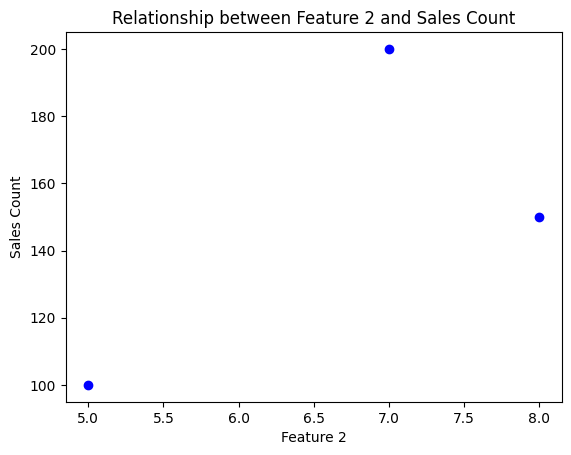

In [5]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(shop_data['feature_2'], shop_data['sales_count'], color='blue')
plt.xlabel('Feature 2')
plt.ylabel('Sales Count')
plt.title('Relationship between Feature 2 and Sales Count')
plt.show()


In [6]:
# Correlation matrix for all features and sales_count
correlation_matrix = shop_data.corr()
print(correlation_matrix)


             shop_id  feature_1  feature_2  sales_count
shop_id          NaN        NaN        NaN          NaN
feature_1        NaN   1.000000   0.981981     0.500000
feature_2        NaN   0.981981   1.000000     0.654654
sales_count      NaN   0.500000   0.654654     1.000000


C:\Users\rznis\AppData\Local\Temp\ipykernel_3728\1756958318.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shop_data['feature_2_range'] = pd.cut(shop_data['feature_2'], bins=bins, labels=labels)
C:\Users\rznis\AppData\Local\Temp\ipykernel_3728\1756958318.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = shop_data.groupby('feature_2_range')['sales_count'].mean()


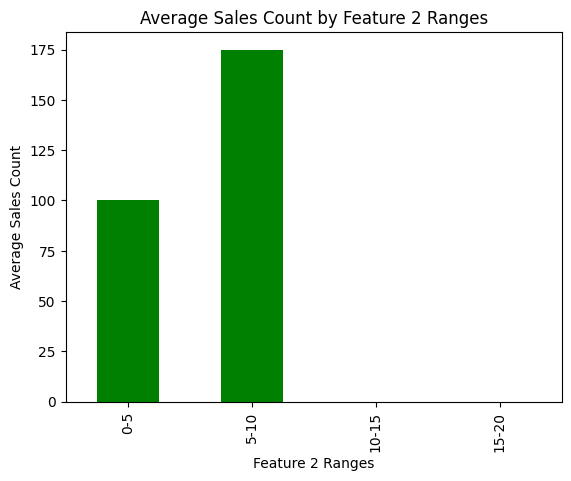

In [8]:
import matplotlib.pyplot as plt

# Define bins for feature_2 ranges
bins = [0, 5, 10, 15, 20]
labels = ['0-5', '5-10', '10-15', '15-20']

# Create a new column for feature_2 ranges
shop_data['feature_2_range'] = pd.cut(shop_data['feature_2'], bins=bins, labels=labels)

# Group by feature_2 ranges and calculate the average sales count
grouped = shop_data.groupby('feature_2_range')['sales_count'].mean()

# Plotting the grouped data
grouped.plot(kind='bar', color='green')
plt.xlabel('Feature 2 Ranges')
plt.ylabel('Average Sales Count')
plt.title('Average Sales Count by Feature 2 Ranges')
plt.show()


In [9]:
from scipy.stats import pearsonr

# Pearson correlation test
corr, p_value = pearsonr(shop_data['feature_2'], shop_data['sales_count'])
print(f"Correlation: {corr}, P-value: {p_value}")


Correlation: 0.6546536707079772, P-value: 0.5456289483429898
